<a href="https://colab.research.google.com/github/spsagar13/Natural-Language-Processing/blob/main/NLP_write_irish_song_lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [4]:
tokenizer = Tokenizer()

#data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
data = open('./irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(total_words)
print(tokenizer.word_index)

2690
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 

In [5]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Model for basic word generation

In [6]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
377/377 [==============================] - 37s 9ms/step - loss: 7.1397 - accuracy: 0.0535
Epoch 2/500
377/377 [==============================] - 3s 8ms/step - loss: 6.3013 - accuracy: 0.0682
Epoch 3/500
377/377 [==============================] - 3s 8ms/step - loss: 6.2155 - accuracy: 0.0679
Epoch 4/500
377/377 [==============================] - 3s 8ms/step - loss: 6.1403 - accuracy: 0.0643
Epoch 5/500
377/377 [==============================] - 3s 8ms/step - loss: 6.0391 - accuracy: 0.0708
Epoch 6/500
377/377 [==============================] - 3s 8ms/step - loss: 5.9732 - accuracy: 0.0781
Epoch 7/500
377/377 [==============================] - 3s 8ms/step - loss: 5.8544 - accuracy: 0.0834
Epoch 8/500
377/377 [==============================] - 3s 9ms/step - loss: 5.7438 - accuracy: 0.0860
Epoch 9/500
377/377 [==============================] - 3s 9ms/step - loss: 5.6668 - accuracy: 0.0922
Epoch 10/500
377/377 [==============================] - 3s 8ms/step - loss: 5.6056 - accur

# Model for Poetry generation

In [7]:
p_model = Sequential()
p_model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
p_model.add(Bidirectional(LSTM(150)))
p_model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
p_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
p_history = p_model.fit(xs,ys, epochs=100, verbose=1)
print(p_model)

Epoch 1/100
377/377 [==============================] - 6s 9ms/step - loss: 6.8291 - accuracy: 0.0632
Epoch 2/100
377/377 [==============================] - 3s 9ms/step - loss: 5.7301 - accuracy: 0.1151
Epoch 3/100
377/377 [==============================] - 4s 9ms/step - loss: 4.6518 - accuracy: 0.1833
Epoch 4/100
377/377 [==============================] - 4s 9ms/step - loss: 3.6424 - accuracy: 0.2801
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 2.8378 - accuracy: 0.3972
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 2.1539 - accuracy: 0.5156
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 1.7173 - accuracy: 0.5999
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 1.3970 - accuracy: 0.6744
Epoch 9/100
377/377 [==============================] - 3s 9ms/step - loss: 1.1934 - accuracy: 0.7166
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 1.0913 - accura

In [8]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
    plt.plot(history.history[string])
#     plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    

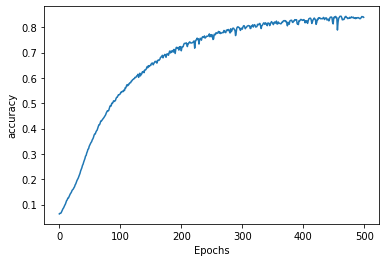

In [9]:
plot_graph(history,"accuracy")

In [10]:
# seed_text = "Laurence went to dublin"
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this star ye ground round says laughing arose pike lure stay build 23rd world weak see times stay danny as slept just turned followed yer loved linnet short instead the grief fell away sailing lies climb a moons bride son me betray glen and his pike flashed in oer poisoning in this rest someone blame pat amiable drives botany kept hoping great erins being strangled shadow being dripping quarters kissd recall recall prison misfortune died ask blame erins john holds kissd streets lazy wheeled corn bubblin tired being strangled for to grieve this rest shed sends neer spoke oer above to
